In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

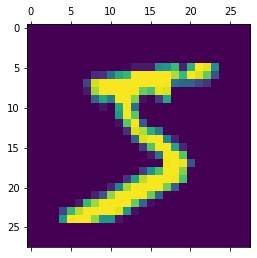

In [8]:
plt.matshow(X_train[0])

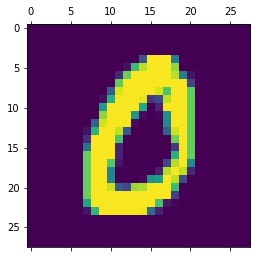

In [9]:
plt.matshow(X_train[95])

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
#Scaling 

X_train = X_train /255
X_test = X_test / 255

In [13]:
X_train_flat = X_train.reshape(len(X_train),28*28)
X_test_flat = X_test.reshape(len(X_test),28*28)

In [14]:
X_test_flat.shape

(10000, 784)

In [15]:
X_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Creating Neural Network with just input and output layers

In [16]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )

model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 4ms/step - loss: 0.4733 - accuracy: 0.8755
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3044 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2834 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9256


In [17]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2707 - accuracy: 0.9254


[0.2706565856933594, 0.9254000186920166]

In [18]:
### Prediction

In [19]:
y_predicted = model.predict(X_test_flat)

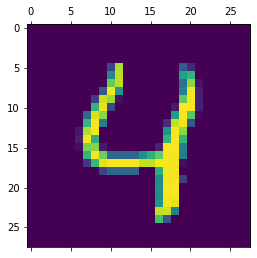

In [20]:
plt.matshow(X_test[4])

In [21]:
y_predicted[4]

array([3.1224525e-02, 3.7168873e-05, 2.2277446e-01, 4.7415146e-03,
       9.9310607e-01, 1.3388124e-02, 1.7586896e-01, 2.5830990e-01,
       2.6192692e-01, 6.4988261e-01], dtype=float32)

In [22]:
np.argmax(y_predicted[4])

4

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:4]

[7, 2, 1, 0]

In [24]:
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [25]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    4,    2,    0,    6,    6,    3,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   3,    9,  941,   15,   13,    4,   11,   10,   23,    3],
       [   2,    0,   21,  924,    1,   26,    2,   11,   17,    6],
       [   1,    2,    5,    1,  940,    0,    7,    3,    6,   17],
       [   7,    2,    7,   34,   12,  781,   10,    7,   27,    5],
       [  10,    3,    8,    1,    8,   14,  910,    2,    2,    0],
       [   1,    6,   24,    5,    9,    1,    0,  961,    1,   20],
       [   5,   10,   12,   27,   10,   36,    9,   14,  843,    8],
       [  10,    7,    2,   13,   54,    8,    0,   36,    1,  878]],
      dtype=int32)>

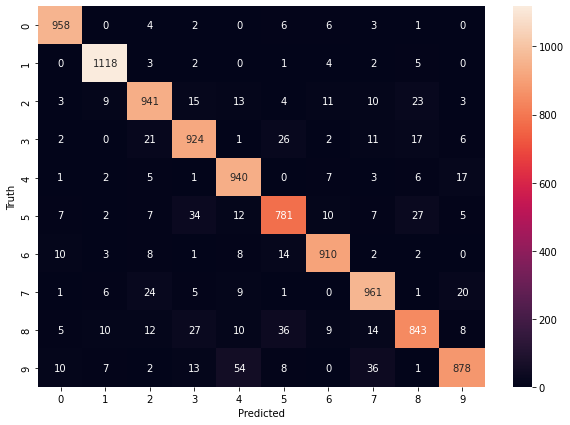

In [26]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel("Truth")
plt.show()

## Adding hidden layers 

In [27]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )

model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1264 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0886 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0674 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0520 - accuracy: 0.9840


In [28]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0896 - accuracy: 0.9740


[0.08957140147686005, 0.9739999771118164]

In [29]:
y_predicted = model.predict(X_test_flat)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

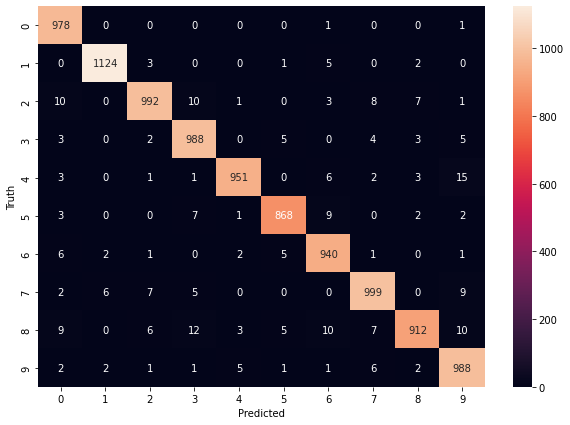

In [30]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel("Truth")
plt.show()

# Using CNN

In [31]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [32]:
y_train[0]

5

In [33]:
x_train = X_train.reshape(-1, 28, 28, 1)

In [34]:
CNN = keras.Sequential([
    #cnn layers
    keras.layers.Conv2D(filters=12,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPool2D((2,2)),
    #dense layers
    keras.layers.Flatten(),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

CNN.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )

CNN.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 3ms/step - loss: 0.1815 - accuracy: 0.9466
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0632 - accuracy: 0.9813
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0421 - accuracy: 0.9873
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0298 - accuracy: 0.9906
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0209 - accuracy: 0.9936


In [37]:
CNN.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0528 - accuracy: 0.9842


[0.052784111350774765, 0.9842000007629395]

In [38]:
y_predicted = CNN.predict(X_test)


In [39]:
y_predicted[0]

array([7.3646206e-10, 1.3018397e-08, 1.8548100e-08, 9.5776933e-09,
       4.3033593e-12, 6.4040305e-12, 3.2108827e-15, 1.0000000e+00,
       1.2841861e-09, 1.8232027e-09], dtype=float32)

In [40]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

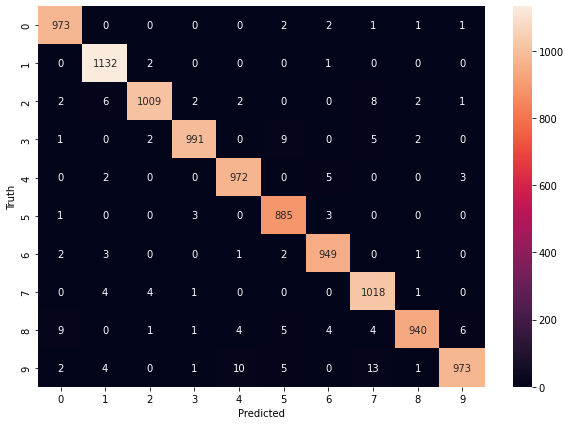

In [41]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel("Truth")
plt.show()